# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [3]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is '/Users/benjaminengel/Downloads/'



<span style="color:red"> **IF THE CODE ABOVE DID NOT FIND YOUR DOWNLOADED FILE, UNCOMMENT AND CHANGE THE `"YOUR FILEPATH HERE"` VARIABLE ONLY IN THE CELL BELOW**

In [4]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
##RAW_FILE = r"YOUR FILEPATH HERE"

<span style="color:red"> **DO NOT CHANGE ANYTHING IN THE CELL BELOW**

In [5]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'/Users/benjaminengel/Downloads/Crimes_-_2001_to_Present.csv'

In [6]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [7]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856198,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7856199,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"
7856200,13128066,JG325838,06/06/2023 03:42:00 PM,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)"
7856201,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,07/15/2023 04:45:57 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"


In [8]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
2206735,1309918,G000412,01/01/2001 01:00:00 AM,032XX N SHEFFIELD AV,0820,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,...,NaN,06,1169005.0,1921458.0,2001,08/17/2015 03:03:40 PM,41.940001,-87.654258,"(41.940000996, -87.654258339)",2001-01-01 01:00:00
5076841,5462733,HN290220,01/01/2001 01:00:00 AM,058XX S INDIANA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,40.0,20,1178551.0,1866538.0,2001,04/25/2007 05:57:12 AM,41.789084,-87.620849,"(41.789084341, -87.620849345)",2001-01-01 01:00:00
2207037,1311269,G001223,01/01/2001 01:00:00 AM,076XX S COLFAX AV,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,NaN,14,1194808.0,1854873.0,2001,08/17/2015 03:03:40 PM,41.756690,-87.561625,"(41.756689633, -87.561625217)",2001-01-01 01:00:00
2208176,1314713,G001044,01/01/2001 01:00:00 PM,017XX W AUGUSTA BV,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,...,NaN,04A,1164232.0,1906669.0,2001,08/17/2015 03:03:40 PM,41.899521,-87.672220,"(41.899521453, -87.672219588)",2001-01-01 01:00:00
2207020,1311226,G000964,01/01/2001 01:00:00 AM,022XX W CORNELIA AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1160728.0,1923242.0,2001,08/17/2015 03:03:40 PM,41.945072,-87.684629,"(41.945072291, -87.684629263)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178539,13153385,JG356233,07/26/2023 12:55:00 AM,028XX E 77TH PL,0810,THEFT,OVER $500,APARTMENT,False,False,...,43.0,06,1196713.0,1854174.0,2023,08/02/2023 04:54:41 PM,41.754724,-87.554667,"(41.754724423, -87.554667078)",2023-07-26 12:55:00
178564,13153405,JG356229,07/26/2023 12:55:00 AM,060XX W 64TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,64.0,14,1137216.0,1861475.0,2023,08/02/2023 04:54:41 PM,41.776031,-87.772534,"(41.776030572, -87.772534138)",2023-07-26 12:55:00
179312,27653,JG356231,07/26/2023 12:55:00 AM,086XX S KINGSTON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,46.0,01A,1194659.0,1848281.0,2023,08/02/2023 04:54:41 PM,41.738604,-87.562388,"(41.738604322, -87.562387717)",2023-07-26 12:55:00
178636,13154525,JG357430,07/26/2023 12:56:00 PM,019XX W CULLERTON ST,0820,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,...,31.0,06,1163781.0,1890422.0,2023,08/02/2023 04:54:41 PM,41.854948,-87.674334,"(41.854947826, -87.674334299)",2023-07-26 12:56:00


## Separate the Full Dataset by Years

In [9]:
chicago_full['Datetime'].dt.year

2206735    2001
5076841    2001
2207037    2001
2208176    2001
2207020    2001
           ... 
178539     2023
178564     2023
179312     2023
178636     2023
179135     2023
Name: Datetime, Length: 7856203, dtype: int64

In [10]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486806
2001    485885
2003    475984
2004    469421
2005    453772
2006    448179
2007    437087
2008    427169
2009    392826
2010    370506
2011    351975
2012    336276
2013    307479
2014    275748
2016    269814
2017    269099
2018    268818
2015    264777
2019    261295
2022    238742
2020    212176
2021    208761
2023    143608
Name: Year, dtype: int64

In [11]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [12]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,2001,41.940001,-87.654258
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625
2001-01-01 01:00:00,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,2001,41.899521,-87.672220
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.945072,-87.684629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26 12:55:00,13153385,07/26/2023 12:55:00 AM,THEFT,OVER $500,APARTMENT,False,False,421,4.0,7.0,2023,41.754724,-87.554667
2023-07-26 12:55:00,13153405,07/26/2023 12:55:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,812,8.0,13.0,2023,41.776031,-87.772534
2023-07-26 12:55:00,27653,07/26/2023 12:55:00 AM,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,423,4.0,7.0,2023,41.738604,-87.562388


In [13]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [14]:
FINAL_DROP = ['Year']

In [15]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [16]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [17]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [18]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=5) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258
1,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
2,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,41.756690,-87.561625
3,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,41.899521,-87.672220
4,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629
...,...,...,...,...,...,...,...,...,...,...,...,...
0,12940914,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,212,2.0,4.0,41.829329,-87.606846
1,12944392,01/01/2023 01:00:00 PM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,915,9.0,11.0,41.833927,-87.641312
2,12938864,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2524,25.0,31.0,41.926884,-87.720720
3,12939172,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,412,4.0,8.0,41.740095,-87.578202


In [19]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    5
2002    5
2003    5
2004    5
2005    5
2006    5
2007    5
2008    5
2009    5
2010    5
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
2021    5
2022    5
2023    5
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

**Task - Stakeholder Questions**

**Import and Confirmation of Saved Files**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import os,glob

import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

plt.rcParams['figure.figsize'] = [10,5]

In [21]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7856203 entries, 2001-01-01 01:00:00 to 2023-07-26 12:57:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 734.2+ MB


**Question One: Comparing Police Districts**

Which district has the most crimes? Which has the least?

In [22]:
#Values for each district
chicago_final['District'].value_counts()

8.0     527671
11.0    503833
6.0     459500
7.0     453458
25.0    446694
4.0     446112
3.0     398428
12.0    389821
9.0     383590
2.0     372257
19.0    353188
18.0    352776
5.0     347845
10.0    338532
15.0    336107
1.0     318391
14.0    303790
16.0    263139
22.0    257376
24.0    237587
17.0    226725
20.0    139086
31.0       246
21.0         4
Name: District, dtype: int64

District 8 has the most crimes. District 21 has the least crimes.

**Question Two: Crimes Across the Years**

Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [23]:
#Only the years with all of the crimes attached to each year
chicago_final['years'] = chicago_final['Date'].map(lambda x: x.split()[0].split('/')[-1])
chicago_final['years'].value_counts().sort_index()

2001    485885
2002    486806
2003    475984
2004    469421
2005    453772
2006    448179
2007    437087
2008    427169
2009    392826
2010    370506
2011    351975
2012    336276
2013    307479
2014    275748
2015    264777
2016    269814
2017    269099
2018    268818
2019    261295
2020    212176
2021    208761
2022    238742
2023    143608
Name: years, dtype: int64

Total number of crimes are deacreasing over the years.

In [24]:
#Adding count column to df
chicago_final['Count'] = 1

In [25]:
#Resample the data as Annual 
chifin_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()
chifin_year

/var/folders/x9/3qks5g991w745rj9dzrqqy200000gn/T/ipykernel_41262/3346989666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chifin_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()
/var/folders/x9/3qks5g991w745rj9dzrqqy200000gn/T/ipykernel_41262/3346989666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chifin_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()
/var/folders/x9/3qks5g991w745rj9dzrqqy200000gn/T/ipykernel_41262/3346989666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated

/var/folders/x9/3qks5g991w745rj9dzrqqy200000gn/T/ipykernel_41262/3346989666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chifin_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()
/var/folders/x9/3qks5g991w745rj9dzrqqy200000gn/T/ipykernel_41262/3346989666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chifin_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()


,Primary Type,Datetime,Count
0,ARSON,2001-12-31,1011
1,ARSON,2002-12-31,1032
2,ARSON,2003-12-31,955
3,ARSON,2004-12-31,778
4,ARSON,2005-12-31,691
...,...,...,...
749,WEAPONS VIOLATION,2019-12-31,6339
750,WEAPONS VIOLATION,2020-12-31,8432
751,WEAPONS VIOLATION,2021-12-31,8980
752,WEAPONS VIOLATION,2022-12-31,8766


In [26]:
#Pivoting to have datetime as the index and crime as columns
years_cf = chifin_year.pivot(index='Datetime',columns='Primary Type')
years_cf

Count                             \
Primary Type   ARSON  ASSAULT  BATTERY BURGLARY   
Datetime                                          
2001-12-31    1011.0  31384.0  93461.0  26014.0   
2002-12-31    1032.0  31523.0  94153.0  25623.0   
2003-12-31     955.0  29477.0  88380.0  25157.0   
2004-12-31     778.0  28850.0  87136.0  24564.0   
2005-12-31     691.0  27067.0  83964.0  25503.0   
2006-12-31     726.0  25945.0  80666.0  24324.0   
2007-12-31     712.0  26313.0  79593.0  24858.0   
2008-12-31     644.0  25449.0  75926.0  26218.0   
2009-12-31     616.0  22861.0  68460.0  26767.0   
2010-12-31     522.0  21537.0  65402.0  26422.0   
2011-12-31     504.0  20411.0  60459.0  26620.0   
2012-12-31     469.0  19900.0  59134.0  22845.0   
2013-12-31     364.0  17972.0  54006.0  17895.0   
2014-12-31     397.0  16903.0  49452.0  14569.0   
2015-12-31     453.0  17048.0  48923.0  13184.0   
2016-12-31     516.0  18742.0  50299.0  14289.0   
2017-12-31     444.0  19306.0  49239.0  13001.0   
2018-12-31     373.0  20406.0  49828.0  11747.0   
2019-12-31     376.0  20620.0  49517.0   9638.0   
2020-12-31     588.0  18254.0  41512.0   8757.0   
2021-12-31     529.0  20342.0  40459.0   6659.0   
2022-12-31     422.0  20790.0  40897.0   7592.0   
2023-12-31     281.0  12514.0  24467.0   4102.0   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Datetime                                                             
2001-12-31                                 1.0              1779.0   
2002-12-31                                 0.0              1807.0   
2003-12-31                                 0.0              1571.0   
2004-12-31                                 0.0              1538.0   
2005-12-31                                 0.0              1521.0   
2006-12-31                                 0.0              1440.0   
2007-12-31                                 0.0              1507.0   
2008-12-31                                 0.0              1516.0   
2009-12-31                                 0.0              1403.0   
2010-12-31                                 0.0              1337.0   
2011-12-31                                 0.0              1460.0   
2012-12-31                                 0.0              1396.0   
2013-12-31                                 0.0              1272.0   
2014-12-31                                15.0              1314.0   
2015-12-31                                34.0              1352.0   
2016-12-31                                36.0              1498.0   
2017-12-31                                69.0              1510.0   
2018-12-31                               149.0              1399.0   
2019-12-31                               217.0               908.0   
2020-12-31                               148.0                75.0   
2021-12-31                               173.0                 NaN   
2022-12-31                               177.0                 NaN   
2023-12-31                               110.0                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Datetime                                                                 
2001-12-31           55859.0                    29.0           13241.0   
2002-12-31           55941.0                    27.0           13880.0   
2003-12-31           55011.0                    41.0           14807.0   
2004-12-31           53164.0                    41.0           15913.0   
2005-12-31           54548.0                    37.0           16655.0   
2006-12-31           57124.0                    46.0           14505.0   
2007-12-31           53749.0                    53.0           13699.0   
2008-12-31           52842.0                    42.0           12310.0   
2009-12-31           47725.0                    40.0 

In [27]:
##Substracting to get the number of crimes between all years
delta_crime_yrs = years_cf.loc['2023-12-31'] - years_cf.loc['2001-12-31']
delta_crime_yrs

       Primary Type                     
Count  ARSON                                 -730.0
       ASSAULT                             -18870.0
       BATTERY                             -68994.0
       BURGLARY                            -21912.0
       CONCEALED CARRY LICENSE VIOLATION      109.0
       CRIM SEXUAL ASSAULT                      NaN
       CRIMINAL DAMAGE                     -39155.0
       CRIMINAL SEXUAL ASSAULT                851.0
       CRIMINAL TRESPASS                   -10603.0
       DECEPTIVE PRACTICE                   -6009.0
       DOMESTIC VIOLENCE                        NaN
       GAMBLING                              -928.0
       HOMICIDE                              -310.0
       HUMAN TRAFFICKING                        NaN
       INTERFERENCE WITH PUBLIC OFFICER       -86.0
       INTIMIDATION                          -125.0
       KIDNAPPING                            -854.0
       LIQUOR LAW VIOLATION                 -1528.0
       MOTOR VEHICLE TH

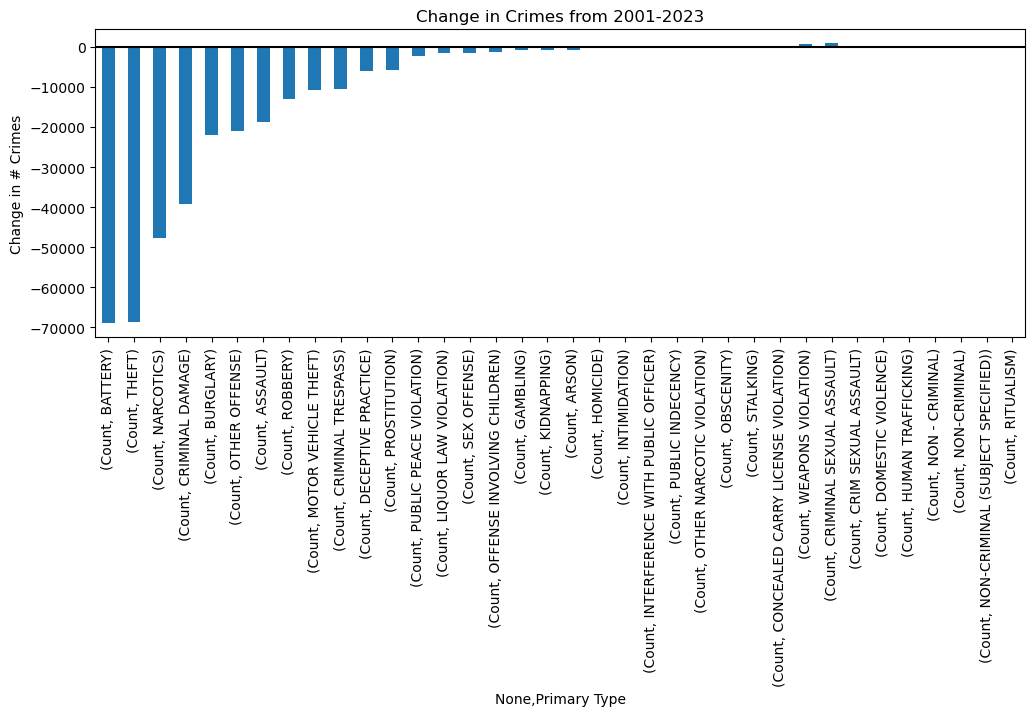

In [30]:
ax = delta_crime_yrs.sort_values().plot(kind='bar',figsize=(12,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2001-2023')
ax.axhline(0,color='k');

Overall, Crime has decreased. However weapons violation and criminal sexual assault increase slightly over time.

**Question Four: Comparing Months**

What months have the most crime? What months have the least?

Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [42]:
#Extracting the Month
chicago_final['Month'] = chicago_final.index.month
chicago_final['MonthName'] = chicago_final.index.month_name()
chicago_final.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,years,Count,Month,MonthName
Datetime,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,2001-01-01 01:00:00,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,2001,41.940001,-87.654258,2001,1,1,January
2001-01-01 01:00:00,5462733,2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849,2001,1,1,January
2001-01-01 01:00:00,1311269,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625,2001,1,1,January


In [43]:
#Saving a lookup for number vs name
unique_months = chicago_final.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

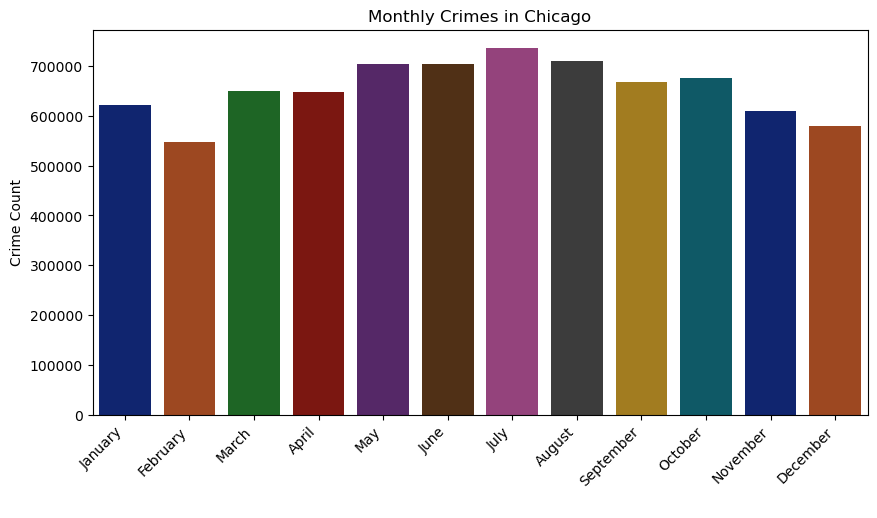

In [45]:
ax = sns.countplot(data=chicago_final, x='MonthName',palette='dark',order=month_lookup.values());
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Monthly Crimes in Chicago")
ax.set_ylabel("Crime Count")
ax.set_xlabel(" ");
plt.show()

In [46]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7856203 entries, 2001-01-01 01:00:00 to 2023-07-26 12:57:00
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Year                  object        
 11  Latitude              float64       
 12  Longitude             float64       
 13  years                 object        
 14  Count                 int64         
 15  Month                 int64         
 16  MonthName             object        
dtypes: bool(2), datetime64[ns](1), float64(4), int64(4)

In [52]:
crime_by_month = chicago_final.groupby("Primary Type")['MonthName'].value_counts().to_frame('crime_count')
crime_by_month

crime_count
Primary Type      MonthName             
ARSON             July              1384
                  June              1285
                  May               1284
                  August            1182
                  March             1140
...                                  ...
WEAPONS VIOLATION March             8801
                  January           8674
                  November          7952
                  December          7401
                  February          7041

[415 rows x 1 columns]

In [61]:
crime_by_month.reset_index(inplace=True)

In [62]:
crime_by_month

,Primary Type,MonthName,crime_count
0,ARSON,July,1384
1,ARSON,June,1285
2,ARSON,May,1284
3,ARSON,August,1182
4,ARSON,March,1140
...,...,...,...
410,WEAPONS VIOLATION,March,8801
411,WEAPONS VIOLATION,January,8674
412,WEAPONS VIOLATION,November,7952
413,WEAPONS VIOLATION,December,7401


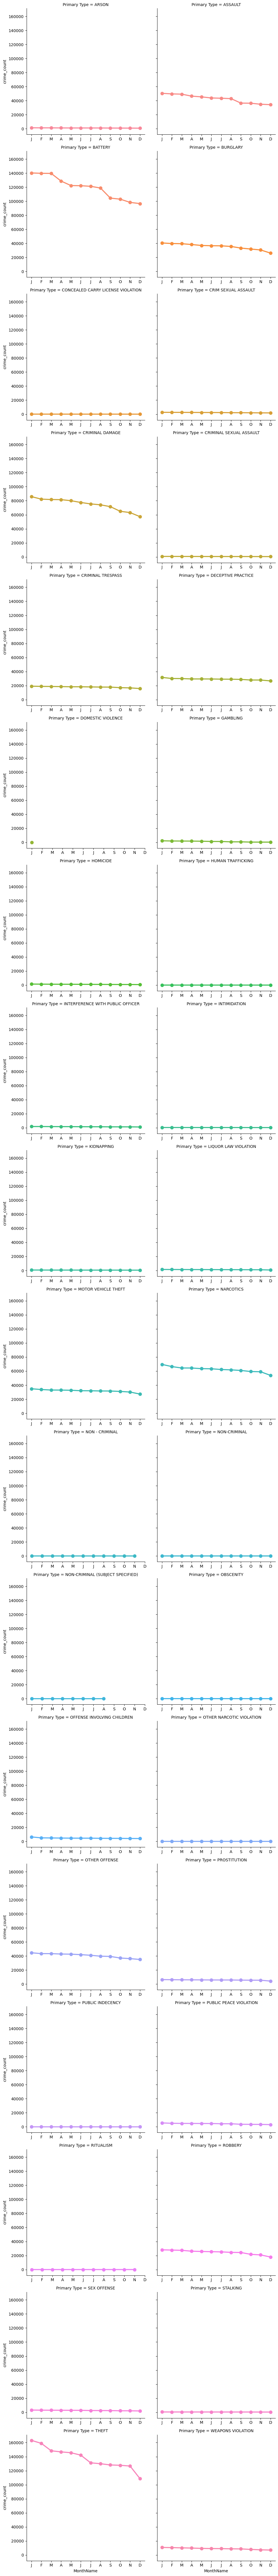

In [65]:
g = sns.catplot(data = crime_by_month, x = 'MonthName', y = 'crime_count', hue = 'Primary Type', col = 'Primary Type',
           col_wrap= 2, kind= 'point', sharex = False, sharey = True)
g.set(xticks=np.arange(12), xticklabels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']);

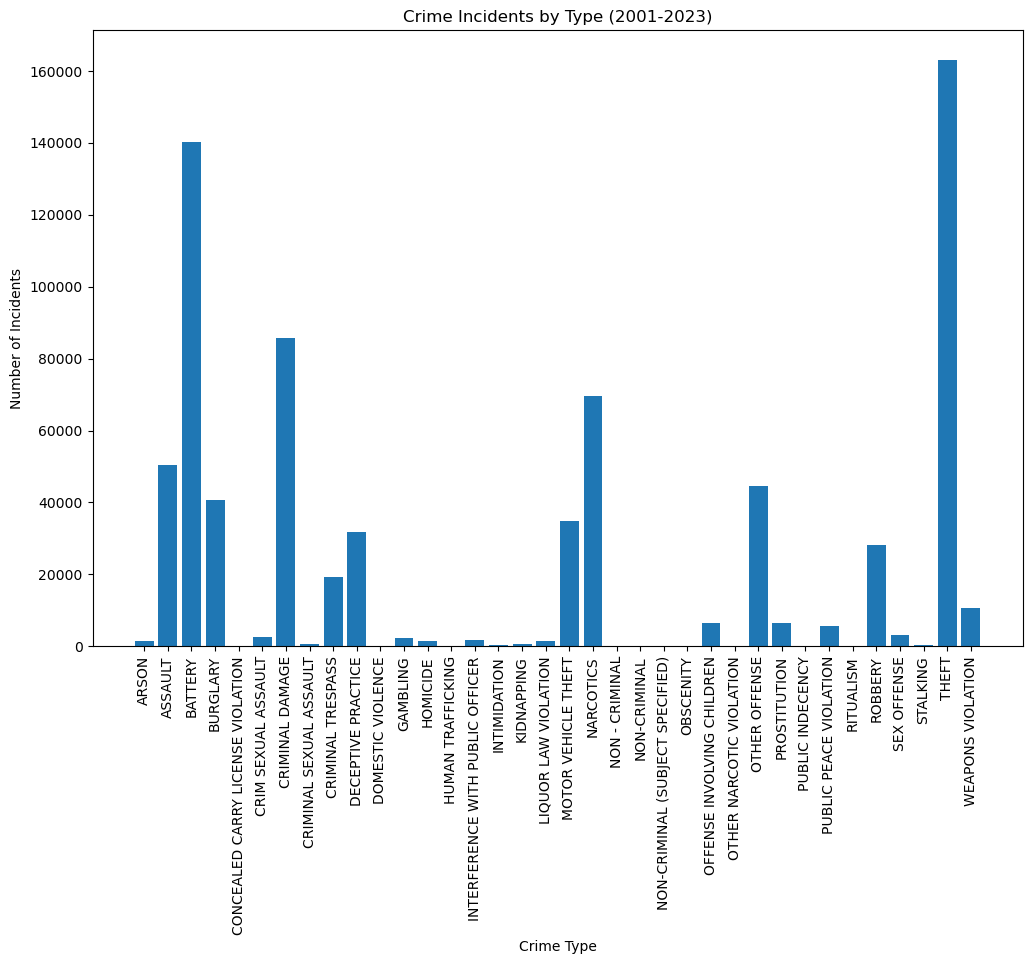

In [67]:
# Create a bar plot of the crime counts
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(crime_by_month['Primary Type'], crime_by_month['crime_count'])

# Set the plot title and axis labels
ax.set_title('Crime Incidents by Type (2001-2023)')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Number of Incidents')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

From my three plots, we can see that July and August have the most crime incidents. December and February have the least number of crimes.

For the types of crimes, we can see that Theft and Battery  are by far the most prevalent. Both crimes surprisingly start highest at the beginning of the year and decrease during that year. Winter to winter.

I would have guessed for increased incidences in the summer.